## A comparison between the capture on the 11. of may 2025, between the H1 and H2 sattelite

### Imports

In [2]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

In [2]:
importlib.reload(f)
importlib.reload(ac)
importlib.reload(atm_c)

<module 'atmosperic_correction' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/atmosperic_correction.py'>

### Data upploading 

In [4]:
## H2
i_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1a.nc")
i_250423_10_b = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1b.nc")
i_250423_10_c = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc")
i_250423_10_d = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1d.nc")

satobj_h1_250423_10 = Hypso2( path = i_250423_10, verbose = True )

l1a_cube_250423_10 = satobj_h1_250423_10.l1a_cube
l1b_cube_250423_10 = Hypso2( path = i_250423_10_b, verbose = True )
l1c_cube_250423_10 = Hypso2( path = i_250423_10_c, verbose = True )
l1d_cube_250423_10 = Hypso2( path = i_250423_10_d, verbose = True )

l1c_cube_250423_10 = l1c_cube_250423_10.l1c_cube
l1b_cube_250423_10 = l1b_cube_250423_10.l1b_cube
l1d_cube_250423_10 = l1d_cube_250423_10.l1d_cube

satobj_h1_250423_10.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 539
[INFO] ADCS time range: 1745403420.000000 to 1745404350.000000
[INFO] Frame time range: 1745404081.613977 to 1745404156.238977
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [5]:
## H2
i_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1a.nc")
i_250423_12_b = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1b.nc")
i_250423_12_c = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc")
i_250423_12_d = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1d.nc")

satobj_h1_250423_12 = Hypso2( path = i_250423_12, verbose = True )

l1a_cube_250423_12 = satobj_h1_250423_12.l1a_cube
l1b_cube_250423_12 = Hypso2( path = i_250423_12_b, verbose = True )
l1c_cube_250423_12 = Hypso2( path = i_250423_12_c, verbose = True )
l1d_cube_250423_12 = Hypso2( path = i_250423_12_d, verbose = True )

l1c_cube_250423_12 = l1c_cube_250423_12.l1c_cube
l1b_cube_250423_12 = l1b_cube_250423_12.l1b_cube
l1d_cube_250423_12 = l1d_cube_250423_12.l1d_cube

satobj_h1_250423_12.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1745409150.000000 to 1745410080.000000
[INFO] Frame time range: 1745409801.005251 to 1745409875.630251
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [11]:
path_cla_atm_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")######
cla_atm_250423_10 = xr.open_dataset(path_cla_atm_250423_10)

latitude_250423_10 = np.array(cla_atm_250423_10['latitude'])
longitude_250423_10 = np.array(cla_atm_250423_10['longitude'])

In [12]:
path_cla_atm_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######
cla_atm_250423_12 = xr.open_dataset(path_cla_atm_250423_12)

latitude_250423_12 = np.array(cla_atm_250423_12['latitude'])
longitude_250423_12 = np.array(cla_atm_250423_12['longitude'])

In [8]:
rho_vars = [var for var in cla_atm_250423_10.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

## ATMC RRS

### H1 analyse m atmc

In [9]:
wl = satobj_h1_250423_10.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
#target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  
#
#target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
#target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_6 = [64.254748,64.280744, 64.152913, 64.145967] # ny og midre
target_lon_6 = [9.829630 -0.25, 9.508824 -0.25,9.750527 -0.25,9.492894 -0.25]  

target_lat_5 = [63.959085,63.949196, 63.856648, 63.853017] #ny og mindre
target_lon_5 = [9.415833,9.148865, 9.500427, 9.154358] # ny

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
target_lon_2 = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat_1 = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
target_lon_1 = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 

#### atm corrected data cube

### H2 analyse m atmc kl 10

In [15]:
rss_atmc_250423_10 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_10) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_10_A1, start_end_row_col_250423_10_A1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_10, longitude_250423_10) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_10_A1, area_in_piksel_cols_250423_10_A1 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_10_A1, start_end_row_col_250423_10_A1, latitude_250423_10, longitude_250423_10)
rss_for_250423_10_A1 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_10_A1, area_in_piksel_cols_250423_10_A1, rss_atmc_250423_10) #***********'

median_250423_10_A1 = np.median(rss_for_250423_10_A1, axis=0) #**************

normaized_spectrum_median_250423_10_A1 = f.min_max_nomralization(median_250423_10_A1) #**********

l2_norm_median_250423_10_A1 = np.linalg.norm(median_250423_10_A1)  #l2 norm ****************
l2_normalized_median_spectrum_250423_10_A1 = median_250423_10_A1 / l2_norm_median_250423_10_A1  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_10_A1.shape) #*********
print("Median RSS for area:", median_250423_10_A1.shape)            #*********
print(median_250423_10_A1)                                          #*********    

number of pixels in area: (30, 109)
Median RSS for area: (109,)
[-1.1346876e-03 -3.2671429e-03 -1.8026776e-03  1.0671689e-05
 -2.1527745e-04 -1.2771620e-03  2.4662716e-03  2.0632376e-03
  4.7947811e-03  3.3957160e-03  5.6167105e-03  3.5006357e-03
  4.8220763e-03  5.1209815e-03  4.7763959e-03  6.1529470e-03
  5.0507728e-03  5.4865945e-03  6.7301318e-03  6.5601966e-03
  6.5764305e-03  9.2032459e-03  7.5159590e-03  7.3943185e-03
  7.4399691e-03  6.3539515e-03  6.9698161e-03  7.9431105e-03
  8.4454650e-03  6.3310978e-03  7.9830084e-03  1.0609549e-02
  7.5180074e-03  7.6394617e-03  8.2988897e-03  8.3011612e-03
  6.9869058e-03  7.9880022e-03  7.4010585e-03  6.9951927e-03
  6.9881864e-03  7.1366304e-03  6.8984637e-03  6.8946513e-03
  6.1206049e-03  6.3684564e-03  6.1526084e-03  5.8702044e-03
  6.4142467e-03  7.2499160e-03  5.3215856e-03  5.2335272e-03
  5.1435572e-03  4.8379609e-03  4.8039006e-03  4.6613808e-03
  4.5019910e-03  4.3798168e-03  3.7596566e-03  3.7743230e-03
  3.0687354e-03  2.93

In [16]:
#plt.imshow(rss_atmc_250511_H2)
#plt.imshow(l1d_cube_250511_2[:,:, 100], origin='upper')
#plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

In [16]:
rss_atmc_250423_10 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_10) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_10_A2, start_end_row_col_250423_10_A2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250423_10, longitude_250423_10) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_10_A2, area_in_piksel_cols_250423_10_A2 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_10_A2, start_end_row_col_250423_10_A2, latitude_250423_10, longitude_250423_10)
rss_for_250423_10_A2 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_10_A2, area_in_piksel_cols_250423_10_A2, rss_atmc_250423_10) #***********'

median_250423_10_A2 = np.median(rss_for_250423_10_A2, axis=0) #**************

normaized_spectrum_median_250423_10_A2 = f.min_max_nomralization(median_250423_10_A2) #**********

l2_norm_median_250423_10_A2 = np.linalg.norm(median_250423_10_A2)  #l2 norm ****************
l2_normalized_median_spectrum_250423_10_A2 = median_250423_10_A2 / l2_norm_median_250423_10_A2  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_10_A2.shape) #*********
print("Median RSS for area:", median_250423_10_A2.shape)            #*********
print(median_250423_10_A2)                                          #*********    

number of pixels in area: (301, 109)
Median RSS for area: (109,)
[ 5.85189380e-04 -2.40273634e-03 -7.10157270e-04  1.63068390e-03
  1.33290386e-03 -5.53119171e-04  4.90780082e-03  3.84793989e-03
  7.86547642e-03  5.36945276e-03  8.83769430e-03  5.90977911e-03
  7.84923974e-03  8.12103506e-03  8.14000424e-03  9.81041696e-03
  8.79950821e-03  9.32941120e-03  1.06516415e-02  1.04034198e-02
  1.10315150e-02  1.38270045e-02  1.20554920e-02  1.19185923e-02
  1.22237792e-02  1.08462758e-02  1.15673356e-02  1.30087426e-02
  1.35454312e-02  1.10176802e-02  1.29046915e-02  1.60985142e-02
  1.23825027e-02  1.26892701e-02  1.33761922e-02  1.35135893e-02
  1.18362159e-02  1.30178062e-02  1.21397404e-02  1.16101364e-02
  1.15387021e-02  1.18448576e-02  1.12965116e-02  1.12363948e-02
  1.02028903e-02  1.05217081e-02  1.00102713e-02  9.63843521e-03
  1.03678275e-02  1.13286972e-02  8.88098124e-03  8.64017010e-03
  8.42482131e-03  8.00026394e-03  7.96356797e-03  7.64997164e-03
  7.35962717e-03  7.25840

In [17]:
rss_atmc_250423_10 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_10) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_10_A3, start_end_row_col_250423_10_A3 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250423_10, longitude_250423_10) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_10_A3, area_in_piksel_cols_250423_10_A3 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_10_A3, start_end_row_col_250423_10_A3, latitude_250423_10, longitude_250423_10)
rss_for_250423_10_A3 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_10_A3, area_in_piksel_cols_250423_10_A3, rss_atmc_250423_10) #***********'

median_250423_10_A3 = np.median(rss_for_250423_10_A3, axis=0) #**************

normaized_spectrum_median_250423_10_A3 = f.min_max_nomralization(median_250423_10_A3) #**********

l2_norm_median_250423_10_A3 = np.linalg.norm(median_250423_10_A3)  #l2 norm ****************
l2_normalized_median_spectrum_250423_10_A3 = median_250423_10_A3 / l2_norm_median_250423_10_A3  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_10_A3.shape) #*********
print("Median RSS for area:", median_250423_10_A3.shape)            #*********
print(median_250423_10_A3)                                          #*********    

number of pixels in area: (173, 109)
Median RSS for area: (109,)
[-5.3095006e-05 -2.6093812e-03 -8.9761126e-04  2.4098526e-03
  4.4771787e-04 -1.3935126e-03  4.0901699e-03  2.6848647e-03
  6.6968976e-03  4.0481705e-03  7.6524797e-03  4.4085444e-03
  6.2710606e-03  6.7604179e-03  6.3435067e-03  7.8248316e-03
  6.6756359e-03  7.0856833e-03  8.3609261e-03  8.4505947e-03
  8.3697699e-03  1.1175956e-02  9.2906933e-03  9.3083549e-03
  9.2802905e-03  8.0019627e-03  8.8157710e-03  9.9416561e-03
  1.0615967e-02  7.9127280e-03  9.8609943e-03  1.2661112e-02
  9.2609627e-03  9.5018186e-03  1.0019936e-02  1.0098026e-02
  8.6391335e-03  9.6099013e-03  8.9601018e-03  8.3903726e-03
  8.3923312e-03  8.5901981e-03  8.0949944e-03  8.2078408e-03
  7.2958586e-03  7.5797997e-03  7.1909390e-03  6.8556191e-03
  7.5532058e-03  8.4093697e-03  6.1693657e-03  6.0370369e-03
  5.8799768e-03  5.5290060e-03  5.5512707e-03  5.4234061e-03
  5.1407935e-03  5.0343215e-03  4.3179318e-03  4.3206699e-03
  3.5475309e-03  3.3

In [19]:
rss_atmc_250423_10 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_10) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_10_A5, start_end_row_col_250423_10_A5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250423_10, longitude_250423_10) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_10_A5, area_in_piksel_cols_250423_10_A5 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_10_A5, start_end_row_col_250423_10_A5, latitude_250423_10, longitude_250423_10)
rss_for_250423_10_A5 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_10_A5, area_in_piksel_cols_250423_10_A5, rss_atmc_250423_10) #***********'

median_250423_10_A5 = np.median(rss_for_250423_10_A5, axis=0) #**************

normaized_spectrum_median_250423_10_A5 = f.min_max_nomralization(median_250423_10_A5) #**********

l2_norm_median_250423_10_A5 = np.linalg.norm(median_250423_10_A5)  #l2 norm ****************
l2_normalized_median_spectrum_250423_10_A5 = median_250423_10_A5 / l2_norm_median_250423_10_A5  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_10_A5.shape) #*********
print("Median RSS for area:", median_250423_10_A5.shape)            #*********
print(median_250423_10_A5)                                          #*********    

number of pixels in area: (828, 109)
Median RSS for area: (109,)
[ 0.00135318 -0.0016092   0.00025562  0.00353827  0.00067905 -0.00154121
  0.00415867  0.00247957  0.00660319  0.00375538  0.00775967  0.0042636
  0.00611888  0.00659933  0.00606883  0.00740091  0.00621051  0.0065602
  0.0079053   0.00831668  0.00762666  0.01073391  0.00879793  0.00894769
  0.00879833  0.00743525  0.00822672  0.00955388  0.01022068  0.00721066
  0.00920778  0.01224616  0.00856929  0.00878296  0.00943295  0.00949023
  0.00791799  0.00896774  0.00827841  0.00769743  0.00779085  0.00787763
  0.00743326  0.00756949  0.00652532  0.00691951  0.00654666  0.00614509
  0.00690082  0.00775009  0.00550831  0.00547879  0.00532083  0.00496171
  0.00496874  0.00483778  0.00459826  0.00455753  0.00380227  0.0038466
  0.00307734  0.00290734  0.00310674  0.00282642  0.00299746  0.00259378
  0.00229664  0.00205896  0.00187219  0.00127059  0.00161865  0.00148899
  0.00135484  0.00139276  0.00115702  0.00099497  0.00075598  

In [20]:
rss_atmc_250423_10 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_10) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_10_A6, start_end_row_col_250423_10_A6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250423_10, longitude_250423_10) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_10_A6, area_in_piksel_cols_250423_10_A6 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_10_A6, start_end_row_col_250423_10_A6, latitude_250423_10, longitude_250423_10)
rss_for_250423_10_A6 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_10_A6, area_in_piksel_cols_250423_10_A6, rss_atmc_250423_10) #***********'

median_250423_10_A6 = np.median(rss_for_250423_10_A6, axis=0) #**************

normaized_spectrum_median_250423_10_A6 = f.min_max_nomralization(median_250423_10_A6) #**********

l2_norm_median_250423_10_A6 = np.linalg.norm(median_250423_10_A6)  #l2 norm ****************
l2_normalized_median_spectrum_250423_10_A6 = median_250423_10_A6 / l2_norm_median_250423_10_A6  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_10_A6.shape) #*********
print("Median RSS for area:", median_250423_10_A6.shape)            #*********
print(median_250423_10_A6)                                          #*********    

number of pixels in area: (1554, 109)
Median RSS for area: (109,)
[ 0.00158549 -0.00139651  0.00048118  0.00384736  0.00093241 -0.00137467
  0.00453467  0.00278194  0.00707547  0.00408257  0.00823607  0.00460207
  0.00651007  0.00697812  0.00645953  0.00779841  0.00657219  0.00689475
  0.00832099  0.00876892  0.008027    0.01125392  0.00921429  0.0093847
  0.00921875  0.00779024  0.00862403  0.00998241  0.01069989  0.00755451
  0.00963485  0.01281585  0.00895811  0.00918517  0.00982943  0.00990681
  0.00825496  0.00935157  0.00860846  0.00801473  0.00810294  0.00819715
  0.00772789  0.00785921  0.00675367  0.00716712  0.006754    0.00634951
  0.00713498  0.00801965  0.00565141  0.00561782  0.00546659  0.00511247
  0.00512825  0.00499864  0.00475904  0.00470946  0.0039288   0.00396815
  0.00317201  0.00298725  0.00319945  0.00290496  0.00309751  0.00267819
  0.00236062  0.00210823  0.00192553  0.00130888  0.00170311  0.00157796
  0.00144442  0.00150883  0.00124834  0.0010827   0.0008319

### Atmc corected kl 12

In [29]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A1, start_end_row_col_250423_12_A1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A1, area_in_piksel_cols_250423_12_A1 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A1, start_end_row_col_250423_12_A1, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A1 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A1, area_in_piksel_cols_250423_12_A1, rss_atmc_250423_12) #***********'

median_250423_12_A1 = np.median(rss_for_250423_12_A1, axis=0) #**************

normaized_spectrum_median_250423_12_A1 = f.min_max_nomralization(median_250423_12_A1) #**********

l2_norm_median_250423_12_A1 = np.linalg.norm(median_250423_12_A1)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A1 / l2_norm_median_250423_12_A1  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A1.shape) #*********
print("Median RSS for area:", median_250423_12_A1.shape)            #*********
print(median_250423_12_A1)                                          #*********    

number of pixels in area: (323, 109)
Median RSS for area: (109,)
[-1.5741258e-03 -4.2156125e-03 -2.3006189e-03  1.3798068e-04
 -2.8005263e-04 -2.0698968e-03  2.9998734e-03  1.9636459e-03
  5.6514652e-03  3.3498132e-03  6.5490208e-03  3.8064199e-03
  5.4753660e-03  5.7888459e-03  5.5168006e-03  6.9935741e-03
  5.8834292e-03  6.1685885e-03  7.4418806e-03  7.2199204e-03
  7.6071611e-03  1.0210322e-02  8.5210223e-03  8.3430624e-03
  8.4510427e-03  7.2200885e-03  7.8654625e-03  9.0568066e-03
  9.5994202e-03  7.2687026e-03  9.1138827e-03  1.1909867e-02
  8.5895415e-03  8.7192869e-03  9.3393316e-03  9.4666174e-03
  8.0649694e-03  9.1057010e-03  8.5011376e-03  7.9381876e-03
  7.9798214e-03  8.1819864e-03  7.7539217e-03  7.8547047e-03
  6.8604541e-03  7.1740984e-03  6.8756090e-03  6.6744173e-03
  7.4991463e-03  8.3703920e-03  6.1954795e-03  6.1001787e-03
  5.9892437e-03  5.6817136e-03  5.7280036e-03  5.5906461e-03
  5.3579896e-03  5.3235283e-03  4.5066979e-03  4.4764844e-03
  3.5952399e-03  3.3

In [30]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A2, start_end_row_col_250423_12_A2 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A2, area_in_piksel_cols_250423_12_A2 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A2, start_end_row_col_250423_12_A2, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A2 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A2, area_in_piksel_cols_250423_12_A2, rss_atmc_250423_12) #***********'

median_250423_12_A2 = np.median(rss_for_250423_12_A2, axis=0) #**************

normaized_spectrum_median_250423_12_A2 = f.min_max_nomralization(median_250423_12_A2) #**********

l2_norm_median_250423_12_A2 = np.linalg.norm(median_250423_12_A2)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A2 / l2_norm_median_250423_12_A2  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A2.shape) #*********
print("Median RSS for area:", median_250423_12_A2.shape)            #*********
print(median_250423_12_A2)                                          #*********    

number of pixels in area: (323, 109)
Median RSS for area: (109,)
[-1.5741258e-03 -4.2156125e-03 -2.3006189e-03  1.3798068e-04
 -2.8005263e-04 -2.0698968e-03  2.9998734e-03  1.9636459e-03
  5.6514652e-03  3.3498132e-03  6.5490208e-03  3.8064199e-03
  5.4753660e-03  5.7888459e-03  5.5168006e-03  6.9935741e-03
  5.8834292e-03  6.1685885e-03  7.4418806e-03  7.2199204e-03
  7.6071611e-03  1.0210322e-02  8.5210223e-03  8.3430624e-03
  8.4510427e-03  7.2200885e-03  7.8654625e-03  9.0568066e-03
  9.5994202e-03  7.2687026e-03  9.1138827e-03  1.1909867e-02
  8.5895415e-03  8.7192869e-03  9.3393316e-03  9.4666174e-03
  8.0649694e-03  9.1057010e-03  8.5011376e-03  7.9381876e-03
  7.9798214e-03  8.1819864e-03  7.7539217e-03  7.8547047e-03
  6.8604541e-03  7.1740984e-03  6.8756090e-03  6.6744173e-03
  7.4991463e-03  8.3703920e-03  6.1954795e-03  6.1001787e-03
  5.9892437e-03  5.6817136e-03  5.7280036e-03  5.5906461e-03
  5.3579896e-03  5.3235283e-03  4.5066979e-03  4.4764844e-03
  3.5952399e-03  3.3

In [31]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A3, start_end_row_col_250423_12_A3 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A3, area_in_piksel_cols_250423_12_A3 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A3, start_end_row_col_250423_12_A3, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A3 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A3, area_in_piksel_cols_250423_12_A3, rss_atmc_250423_12) #***********'

median_250423_12_A3 = np.median(rss_for_250423_12_A3, axis=0) #**************

normaized_spectrum_median_250423_12_A3 = f.min_max_nomralization(median_250423_12_A3) #**********

l2_norm_median_250423_12_A3 = np.linalg.norm(median_250423_12_A3)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A3 / l2_norm_median_250423_12_A3  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A3.shape) #*********
print("Median RSS for area:", median_250423_12_A3.shape)            #*********
print(median_250423_12_A3)                                          #*********    

number of pixels in area: (167, 109)
Median RSS for area: (109,)
[-4.3580164e-03 -5.9292368e-03 -3.1948437e-03  8.0844382e-04
  3.9071823e-04 -1.1202969e-03  5.5205091e-03  5.1028794e-03
  1.0240208e-02  8.0821021e-03  1.2981408e-02  9.9552199e-03
  1.2788101e-02  1.3297977e-02  1.3240684e-02  1.5050749e-02
  1.3939363e-02  1.4355908e-02  1.6308455e-02  1.6343858e-02
  1.6550737e-02  1.9721618e-02  1.7654832e-02  1.7569123e-02
  1.7773969e-02  1.6326509e-02  1.7366456e-02  1.8600630e-02
  1.9571910e-02  1.6308960e-02  1.8346390e-02  2.1396387e-02
  1.7811600e-02  1.8069077e-02  1.8502722e-02  1.8613290e-02
  1.6857103e-02  1.7770164e-02  1.7050574e-02  1.6393755e-02
  1.6098892e-02  1.6297141e-02  1.5495315e-02  1.5480650e-02
  1.3909451e-02  1.4173651e-02  1.3523389e-02  1.2956010e-02
  1.3655637e-02  1.4479153e-02  1.1721599e-02  1.1386443e-02
  1.1300630e-02  1.0500045e-02  1.0413407e-02  9.9360049e-03
  9.6636461e-03  9.3596987e-03  8.2577271e-03  8.0598379e-03
  6.6770464e-03  6.2

In [32]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A4, start_end_row_col_250423_12_A4 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A4, area_in_piksel_cols_250423_12_A4 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A4, start_end_row_col_250423_12_A4, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A4 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A4, area_in_piksel_cols_250423_12_A4, rss_atmc_250423_12) #***********'

median_250423_12_A4 = np.median(rss_for_250423_12_A4, axis=0) #**************

normaized_spectrum_median_250423_12_A4 = f.min_max_nomralization(median_250423_12_A4) #**********

l2_norm_median_250423_12_A4 = np.linalg.norm(median_250423_12_A4)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A4 / l2_norm_median_250423_12_A4  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A4.shape) #*********
print("Median RSS for area:", median_250423_12_A4.shape)            #*********
print(median_250423_12_A4)                                          #*********    

number of pixels in area: (417, 109)
Median RSS for area: (109,)
[-3.55976546e-04 -3.07069486e-03 -1.06138748e-03  2.36429810e-03
 -7.96467157e-06 -1.82365160e-03  3.78107280e-03  2.26663984e-03
  6.25101384e-03  3.61800054e-03  7.29513634e-03  4.12807520e-03
  5.99831296e-03  6.44147582e-03  6.06754096e-03  7.38072116e-03
  6.18111482e-03  6.52969349e-03  7.81009812e-03  8.08595680e-03
  7.79610081e-03  1.06169228e-02  8.79636966e-03  8.88323970e-03
  8.83118901e-03  7.57768005e-03  8.25595297e-03  9.57051199e-03
  1.02200685e-02  7.52577372e-03  9.39546060e-03  1.23903910e-02
  8.86257831e-03  9.03959200e-03  9.64706112e-03  9.76936333e-03
  8.26040469e-03  9.31036845e-03  8.67789425e-03  8.10887944e-03
  8.17438401e-03  8.29191972e-03  7.80297583e-03  7.88597669e-03
  6.79616956e-03  7.13906996e-03  6.74698642e-03  6.42775511e-03
  7.25589367e-03  8.11658613e-03  5.85997896e-03  5.83389541e-03
  5.77535899e-03  5.46131516e-03  5.47109451e-03  5.33403084e-03
  5.10633271e-03  5.01332

In [33]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A5, start_end_row_col_250423_12_A5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A5, area_in_piksel_cols_250423_12_A5 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A5, start_end_row_col_250423_12_A5, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A5 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A5, area_in_piksel_cols_250423_12_A5, rss_atmc_250423_12) #***********'

median_250423_12_A5 = np.median(rss_for_250423_12_A5, axis=0) #**************

normaized_spectrum_median_250423_12_A5 = f.min_max_nomralization(median_250423_12_A5) #**********

l2_norm_median_250423_12_A5 = np.linalg.norm(median_250423_12_A5)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A5 / l2_norm_median_250423_12_A5  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A5.shape) #*********
print("Median RSS for area:", median_250423_12_A5.shape)            #*********
print(median_250423_12_A5)                                          #*********    

number of pixels in area: (26, 109)
Median RSS for area: (109,)
[ 1.3827195e-03 -1.3835472e-03  4.7261867e-04  3.5710232e-03
  3.9782701e-04 -1.4662117e-03  4.0009320e-03  2.2976096e-03
  6.1492752e-03  3.4216819e-03  7.2629666e-03  3.9670193e-03
  5.7255332e-03  6.2284013e-03  5.6297085e-03  6.9044242e-03
  5.6995368e-03  5.9891939e-03  7.2774081e-03  7.8096744e-03
  6.9831926e-03  9.9724624e-03  8.0292067e-03  8.3347317e-03
  8.0889417e-03  6.7806300e-03  7.5575626e-03  8.8126315e-03
  9.4926618e-03  6.4653689e-03  8.5125985e-03  1.1328746e-02
  7.8520458e-03  8.0452282e-03  8.7178955e-03  8.7771229e-03
  7.2248783e-03  8.3000418e-03  7.5640054e-03  6.9858255e-03
  7.1202656e-03  7.2083166e-03  6.7166137e-03  6.8544727e-03
  5.7851095e-03  6.1149132e-03  5.7538436e-03  5.4437188e-03
  6.2680822e-03  7.0735738e-03  4.8513417e-03  4.9294559e-03
  4.8262756e-03  4.5051584e-03  4.5518680e-03  4.4697030e-03
  4.2028390e-03  4.1989703e-03  3.4277570e-03  3.4900329e-03
  2.6697975e-03  2.48

In [34]:
rss_atmc_250423_12 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_12) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250423_12_A6, start_end_row_col_250423_12_A6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250423_12, longitude_250423_12) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250423_12_A6, area_in_piksel_cols_250423_12_A6 = atm_c.piksles_in_slected_area(start_end_row_piksel_250423_12_A6, start_end_row_col_250423_12_A6, latitude_250423_12, longitude_250423_12)
rss_for_250423_12_A6 = atm_c.rss_given_pixels(area_in_piksel_rows_250423_12_A6, area_in_piksel_cols_250423_12_A6, rss_atmc_250423_12) #***********'

median_250423_12_A6 = np.median(rss_for_250423_12_A6, axis=0) #**************

normaized_spectrum_median_250423_12_A6 = f.min_max_nomralization(median_250423_12_A6) #**********

l2_norm_median_250423_12_A6 = np.linalg.norm(median_250423_12_A6)  #l2 norm ****************
l2_normalized_median_spectrum_250423_12_A1 = median_250423_12_A6 / l2_norm_median_250423_12_A6  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250423_12_A6.shape) #*********
print("Median RSS for area:", median_250423_12_A6.shape)            #*********
print(median_250423_12_A6)                                          #*********    

number of pixels in area: (293, 109)
Median RSS for area: (109,)
[ 0.00149221 -0.00129984  0.00070727  0.00388957  0.00032794 -0.00173544
  0.00391187  0.00218678  0.00629306  0.00360074  0.00771423  0.00418134
  0.00595056  0.00658369  0.0060575   0.00716564  0.0059288   0.00619061
  0.00764271  0.0085125   0.00720981  0.01053886  0.00847613  0.00888783
  0.0086569   0.00708077  0.00793073  0.00939759  0.01024976  0.00678415
  0.00891073  0.01211019  0.00819052  0.00857442  0.00919014  0.00931602
  0.00762101  0.00877637  0.00806429  0.00748952  0.00765928  0.00759636
  0.00721416  0.00727163  0.00614636  0.00650434  0.00610463  0.00569549
  0.00664847  0.00759447  0.00509039  0.00518645  0.00514676  0.00480776
  0.00484695  0.00475733  0.00453816  0.0044976   0.0036662   0.00379175
  0.00290169  0.00266501  0.00295136  0.00270353  0.0030169   0.00259342
  0.00226369  0.00197781  0.00197466  0.00115194  0.0016929   0.0016061
  0.00148269  0.00156716  0.00128242  0.00112941  0.00090837

## ATM uncoorected

#### H2 RRS analyse NO ATMC kl 10

In [36]:
piksel_row_A1_250423_10, piksel_col_A1_250423_10 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_10, longitude_250423_10) #####________
print(piksel_row_A1_250423_10, piksel_col_A1_250423_10) 

for i in range(4):
    piksel_col_A1_250423_10[i] = piksel_col_A1_250423_10[i]
    piksel_row_A1_250423_10[i] = piksel_row_A1_250423_10[i]

rss_A1_250423_10 = f.water_masked_rss_matrix(piksel_row_A1_250423_10, piksel_col_A1_250423_10, l1d_cube_250423_10, satobj_h1_250423_10)
print(rss_A1_250423_10.shape) 

median_A1_250423_10_NO_atmc = np.median(rss_A1_250423_10, axis = 1)
median_A1_250423_10_NO_atmc.shape
normaized_spectrum_median_A1_250423_10_NO_atmc = f.min_max_nomralization(median_A1_250423_10_NO_atmc)
l2_norm_A1_250423_10_NO_atmc = np.linalg.norm(median_A1_250423_10_NO_atmc)  
l2_normalized_spectrum_A1_250423_10_NO_atmc = median_A1_250423_10_NO_atmc / l2_norm_A1_250423_10_NO_atmc 

[np.int64(351), np.int64(349), np.int64(362), np.int64(360)] [np.int64(0), np.int64(16), np.int64(0), np.int64(2)]
Pixel number:  6
(109, 6)


In [37]:
piksel_row_A2_250423_10, piksel_col_A2_250423_10 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250423_10, longitude_250423_10) #####________
print(piksel_row_A2_250423_10, piksel_col_A2_250423_10) 

for i in range(4):
    piksel_col_A2_250423_10[i] = piksel_col_A2_250423_10[i]
    piksel_row_A2_250423_10[i] = piksel_row_A2_250423_10[i]

rss_A2_250423_10 = f.water_masked_rss_matrix(piksel_row_A2_250423_10, piksel_col_A2_250423_10, l1d_cube_250423_10, satobj_h1_250423_10)
print(rss_A2_250423_10.shape) 

median_A2_250423_10_NO_atmc = np.median(rss_A2_250423_10, axis = 1)
median_A2_250423_10_NO_atmc.shape
normaized_spectrum_median_A2_250423_10_NO_atmc = f.min_max_nomralization(median_A2_250423_10_NO_atmc)
l2_norm_A2_250423_10_NO_atmc = np.linalg.norm(median_A2_250423_10_NO_atmc)  
l2_normalized_spectrum_A2_250423_10_NO_atmc = median_A2_250423_10_NO_atmc / l2_norm_A2_250423_10_NO_atmc 

[np.int64(342), np.int64(346), np.int64(360), np.int64(367)] [np.int64(241), np.int64(274), np.int64(80), np.int64(105)]
Pixel number:  332
(109, 332)


In [38]:
piksel_row_A3_250423_10, piksel_col_A3_250423_10 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250423_10, longitude_250423_10) #####________
print(piksel_row_A3_250423_10, piksel_col_A3_250423_10) 

for i in range(4):
    piksel_col_A3_250423_10[i] = piksel_col_A3_250423_10[i]
    piksel_row_A3_250423_10[i] = piksel_row_A3_250423_10[i]

rss_A3_250423_10 = f.water_masked_rss_matrix(piksel_row_A3_250423_10, piksel_col_A3_250423_10, l1d_cube_250423_10, satobj_h1_250423_10)
print(rss_A3_250423_10.shape) 

median_A3_250423_10_NO_atmc = np.median(rss_A3_250423_10, axis = 1)
median_A3_250423_10_NO_atmc.shape
normaized_spectrum_median_A3_250423_10_NO_atmc = f.min_max_nomralization(median_A3_250423_10_NO_atmc)
l2_norm_A3_250423_10_NO_atmc = np.linalg.norm(median_A3_250423_10_NO_atmc)  
l2_normalized_spectrum_A3_250423_10_NO_atmc = median_A3_250423_10_NO_atmc / l2_norm_A3_250423_10_NO_atmc 

[np.int64(323), np.int64(327), np.int64(344), np.int64(344)] [np.int64(404), np.int64(440), np.int64(372), np.int64(413)]
Pixel number:  180
(109, 180)


In [39]:
piksel_row_A5_250423_10, piksel_col_A5_250423_10 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250423_10, longitude_250423_10) #####________
print(piksel_row_A5_250423_10, piksel_col_A5_250423_10) 

for i in range(4):
    piksel_col_A5_250423_10[i] = piksel_col_A5_250423_10[i]
    piksel_row_A5_250423_10[i] = piksel_row_A5_250423_10[i]

rss_A5_250423_10 = f.water_masked_rss_matrix(piksel_row_A5_250423_10, piksel_col_A5_250423_10, l1d_cube_250423_10, satobj_h1_250423_10)
print(rss_A5_250423_10.shape) 

median_A5_250423_10_NO_atmc = np.median(rss_A5_250423_10, axis = 1)
median_A5_250423_10_NO_atmc.shape
normaized_spectrum_median_A5_250423_10_NO_atmc = f.min_max_nomralization(median_A5_250423_10_NO_atmc)
l2_norm_A5_250423_10_NO_atmc = np.linalg.norm(median_A5_250423_10_NO_atmc)  
l2_normalized_spectrum_A5_250423_10_NO_atmc = median_A5_250423_10_NO_atmc / l2_norm_A5_250423_10_NO_atmc 

[np.int64(306), np.int64(311), np.int64(319), np.int64(323)] [np.int64(488), np.int64(602), np.int64(426), np.int64(579)]
Pixel number:  828
(109, 828)


In [40]:
piksel_row_A6_250423_10, piksel_col_A6_250423_10 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250423_10, longitude_250423_10) #####________
print(piksel_row_A6_250423_10, piksel_col_A6_250423_10) 

for i in range(4):
    piksel_col_A6_250423_10[i] = piksel_col_A6_250423_10[i]
    piksel_row_A6_250423_10[i] = piksel_row_A6_250423_10[i]

rss_A6_250423_10 = f.water_masked_rss_matrix(piksel_row_A6_250423_10, piksel_col_A6_250423_10, l1d_cube_250423_10, satobj_h1_250423_10)
print(rss_A6_250423_10.shape) 

median_A6_250423_10_NO_atmc = np.median(rss_A6_250423_10, axis = 1)
median_A6_250423_10_NO_atmc.shape
normaized_spectrum_median_A6_250423_10_NO_atmc = f.min_max_nomralization(median_A6_250423_10_NO_atmc)
l2_norm_A6_250423_10_NO_atmc = np.linalg.norm(median_A6_250423_10_NO_atmc)  
l2_normalized_spectrum_A6_250423_10_NO_atmc = median_A6_250423_10_NO_atmc / l2_norm_A6_250423_10_NO_atmc 

[np.int64(268), np.int64(268), np.int64(281), np.int64(285)] [np.int64(475), np.int64(620), np.int64(490), np.int64(600)]
Pixel number:  1554
(109, 1554)


### H2 RRS analyse NO atmc kl 12

In [42]:
piksel_row_A1_250423_12, piksel_col_A1_250423_12 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12) #####________
print(piksel_row_A1_250423_12, piksel_col_A1_250423_12) 

for i in range(4):
    piksel_col_A1_250423_12[i] = piksel_col_A1_250423_12[i]
    piksel_row_A1_250423_12[i] = piksel_row_A1_250423_12[i]

rss_A1_250423_12 = f.water_masked_rss_matrix(piksel_row_A1_250423_12, piksel_col_A1_250423_12, l1d_cube_250423_12, satobj_h1_250423_12)
print(rss_A1_250423_12.shape) 

median_A1_250423_12_NO_atmc = np.median(rss_A1_250423_12, axis = 1)
median_A1_250423_12_NO_atmc.shape
normaized_spectrum_median_A1_250423_12_NO_atmc = f.min_max_nomralization(median_A1_250423_12_NO_atmc)
l2_norm_A1_250423_12_NO_atmc = np.linalg.norm(median_A1_250423_12_NO_atmc)  
l2_normalized_spectrum_A1_250423_12_NO_atmc = median_A1_250423_12_NO_atmc / l2_norm_A1_250423_12_NO_atmc 

[np.int64(295), np.int64(307), np.int64(304), np.int64(317)] [np.int64(147), np.int64(256), np.int64(128), np.int64(233)]
Pixel number:  123
(109, 123)


In [43]:
piksel_row_A2_250423_12, piksel_col_A2_250423_12 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250423_12, longitude_250423_12) #####________
print(piksel_row_A2_250423_12, piksel_col_A2_250423_12) 

for i in range(4):
    piksel_col_A2_250423_12[i] = piksel_col_A2_250423_12[i]
    piksel_row_A2_250423_12[i] = piksel_row_A2_250423_12[i]

rss_A2_250423_12 = f.water_masked_rss_matrix(piksel_row_A2_250423_12, piksel_col_A2_250423_12, l1d_cube_250423_12, satobj_h1_250423_12)
print(rss_A2_250423_12.shape) 

median_A2_250423_12_NO_atmc = np.median(rss_A2_250423_12, axis = 1)
median_A2_250423_12_NO_atmc.shape
normaized_spectrum_median_A2_250423_12_NO_atmc = f.min_max_nomralization(median_A2_250423_12_NO_atmc)
l2_norm_A2_250423_12_NO_atmc = np.linalg.norm(median_A2_250423_12_NO_atmc)  
l2_normalized_spectrum_A2_250423_12_NO_atmc = median_A2_250423_12_NO_atmc / l2_norm_A2_250423_12_NO_atmc

[np.int64(310), np.int64(315), np.int64(320), np.int64(328)] [np.int64(374), np.int64(383), np.int64(268), np.int64(268)]
Pixel number:  535
(109, 535)


In [44]:
piksel_row_A3_250423_12, piksel_col_A3_250423_12 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250423_12, longitude_250423_12) #####________
print(piksel_row_A3_250423_12, piksel_col_A3_250423_12) 

for i in range(4):
    piksel_col_A3_250423_12[i] = piksel_col_A3_250423_12[i]
    piksel_row_A3_250423_12[i] = piksel_row_A3_250423_12[i]

rss_A3_250423_12 = f.water_masked_rss_matrix(piksel_row_A3_250423_12, piksel_col_A3_250423_12, l1d_cube_250423_12, satobj_h1_250423_12)
print(rss_A3_250423_12.shape) 

median_A3_250423_12_NO_atmc = np.median(rss_A3_250423_12, axis = 1)
median_A3_250423_12_NO_atmc.shape
normaized_spectrum_median_A3_250423_12_NO_atmc = f.min_max_nomralization(median_A3_250423_12_NO_atmc)
l2_norm_A3_250423_12_NO_atmc = np.linalg.norm(median_A3_250423_12_NO_atmc)  
l2_normalized_spectrum_A3_250423_12_NO_atmc = median_A3_250423_12_NO_atmc / l2_norm_A3_250423_12_NO_atmc

[np.int64(299), np.int64(304), np.int64(317), np.int64(319)] [np.int64(489), np.int64(502), np.int64(437), np.int64(458)]
Pixel number:  448
(109, 448)


In [45]:
piksel_row_A5_250423_12, piksel_col_A5_250423_12 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250423_12, longitude_250423_12) #####________
print(piksel_row_A5_250423_12, piksel_col_A5_250423_12) 

for i in range(4):
    piksel_col_A5_250423_12[i] = piksel_col_A5_250423_12[i]
    piksel_row_A5_250423_12[i] = piksel_row_A5_250423_12[i]

rss_A5_250423_12 = f.water_masked_rss_matrix(piksel_row_A5_250423_12, piksel_col_A5_250423_12, l1d_cube_250423_12, satobj_h1_250423_12)
print(rss_A5_250423_12.shape) 

median_A5_250423_12_NO_atmc = np.median(rss_A5_250423_12, axis = 1)
median_A5_250423_12_NO_atmc.shape
normaized_spectrum_median_A5_250423_12_NO_atmc = f.min_max_nomralization(median_A5_250423_12_NO_atmc)
l2_norm_A5_250423_12_NO_atmc = np.linalg.norm(median_A5_250423_12_NO_atmc)  
l2_normalized_spectrum_A5_250423_12_NO_atmc = median_A5_250423_12_NO_atmc / l2_norm_A5_250423_12_NO_atmc

[np.int64(287), np.int64(296), np.int64(296), np.int64(306)] [np.int64(562), np.int64(620), np.int64(508), np.int64(587)]
Pixel number:  26
(109, 26)


In [46]:
piksel_row_A6_250423_12, piksel_col_A6_250423_12 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250423_12, longitude_250423_12) #####________
print(piksel_row_A6_250423_12, piksel_col_A6_250423_12) 

for i in range(4):
    piksel_col_A6_250423_12[i] = piksel_col_A6_250423_12[i]
    piksel_row_A6_250423_12[i] = piksel_row_A6_250423_12[i]

rss_A6_250423_12 = f.water_masked_rss_matrix(piksel_row_A6_250423_12, piksel_col_A6_250423_12, l1d_cube_250423_12, satobj_h1_250423_12)
print(rss_A6_250423_12.shape) 

median_A6_250423_12_NO_atmc = np.median(rss_A6_250423_12, axis = 1)
median_A6_250423_12_NO_atmc.shape
normaized_spectrum_median_A6_250423_12_NO_atmc = f.min_max_nomralization(median_A6_250423_12_NO_atmc)
l2_norm_A6_250423_12_NO_atmc = np.linalg.norm(median_A6_250423_12_NO_atmc)  
l2_normalized_spectrum_A6_250423_12_NO_atmc = median_A6_250423_12_NO_atmc / l2_norm_A6_250423_12_NO_atmc

[np.int64(250), np.int64(257), np.int64(264), np.int64(272)] [np.int64(629), np.int64(711), np.int64(610), np.int64(665)]
Pixel number:  296
(109, 296)


### Plots

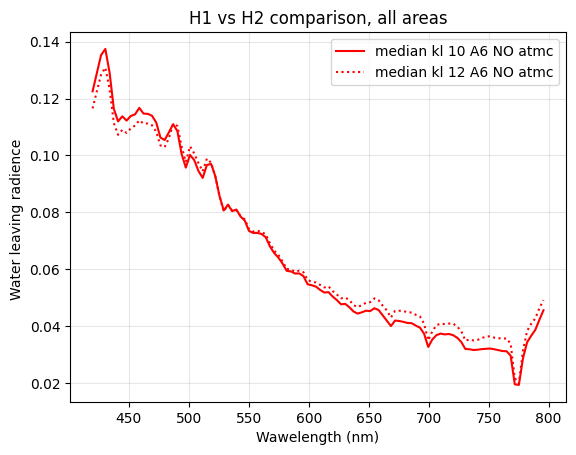

In [63]:
### atmc kl 10
#plt.plot(wl, median_250423_10_A1, color='black', label='median kl 10 A1 atmc')
#plt.plot(wl, median_250423_10_A2, color='pink', label='median kl 10 A2 atmc')
#plt.plot(wl, median_250423_10_A3, color='blue', label='median kl 10 A3 atmc')
#plt.plot(wl, median_250423_10_A5, color='green', label='median kl 10 A5 atmc')
#plt.plot(wl, median_250423_10_A6, color='red', label='median kl 10 A6 atmc')

###atmc kl 12 
#plt.plot(wl, median_250423_12_A1, linestyle=':', color='black', label='median kl 12 A1 atmc')
#plt.plot(wl, median_250423_12_A2, linestyle=':', color='pink', label='median kl 12 A2 atmc')
#plt.plot(wl, median_250423_12_A3, linestyle=':', color='blue', label='median kl 12 A3 atmc')
#plt.plot(wl, median_250423_12_A5, linestyle=':', color='green', label='median kl 12 A5 atmc')
#plt.plot(wl, median_250423_12_A6, linestyle=':', color='red', label='median kl 12 A6 atmc')

## NO corr kl 10
#plt.plot(wl, median_A1_250423_10_NO_atmc, linestyle='-', color='black', label='median kl 10 A1 NO atmc')
#plt.plot(wl, median_A2_250423_10_NO_atmc, linestyle='-', color='pink', label='median kl 10 A2 NO atmc')
#plt.plot(wl, median_A3_250423_10_NO_atmc, linestyle='-', color='blue', label='median kl 10 A3 NO atmc')
#plt.plot(wl, median_A5_250423_10_NO_atmc, linestyle='-', color='green', label='median kl 10 A5 NO atmc')
plt.plot(wl, median_A6_250423_10_NO_atmc, linestyle='-', color='red', label='median kl 10 A6 NO atmc')
#
#
### NO corr kl 12
#plt.plot(wl, median_A1_250423_12_NO_atmc, linestyle=':', color='black', label='median kl 12 A1 NO atmc')
#plt.plot(wl, median_A2_250423_12_NO_atmc, linestyle=':', color='pink', label='median kl 12 A2 NO atmc')
#plt.plot(wl, median_A3_250423_12_NO_atmc, linestyle=':', color='blue', label='median kl 12 A3 NO atmc')
#plt.plot(wl, median_A5_250423_12_NO_atmc, linestyle=':', color='green', label='median kl 12 A5 NO atmc')
plt.plot(wl, median_A6_250423_12_NO_atmc, linestyle=':', color='red', label='median kl 12 A6 NO atmc')


plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #Er begge water leaving radience???
plt.title("H1 vs H2 comparison, all areas")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Derivates

### Cluster